In [1]:
import pandas
import datetime
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [336]:
ab_df = pandas.read_csv('2016-02-16/listings.csv.gz', compression='gzip', usecols=['host_id','host_since','smart_location','number_of_reviews'])
ab_df['any_reviews']  = ab_df['number_of_reviews'].apply(lambda x: int(x!=0))
ab_df_reviewful = ab_df[ab_df['any_reviews'] == 1]
hosts = ab_df.groupby(by='host_id',as_index=True).agg({'host_since':lambda x: min(x),'smart_location': lambda x: min(x)})
hosts_refver = ab_df_reviewful.groupby(by='host_id',as_index=True).agg({'host_since':lambda x: min(x),'smart_location': lambda x: min(x)})

In [319]:
cs_df = pandas.read_csv('couchsurfing/clean_hosts.csv',usecols=['people_id','member_since','city','state','status','verified_status','references_int'])

def get_year(s):
    try:
        return datetime.datetime(int(s.split("Member since ")[1]), 1, 1)
    except:
        return None
    
cs_df['member_since'] = cs_df['member_since'].apply(get_year)
cs_df_defhosts = cs_df[cs_df['status'] == 'Accepting Guests']
cs_df_defhosts['any_verification'] = cs_df_defhosts['verified_status'].apply(lambda x: int(x != 'Not Verified'))
cs_df_defhosts['any_references'] = cs_df_defhosts['references_int'].apply(lambda x: int(x != 0))
cs_df_defhosts['any_ref_ver'] = cs_df_defhosts[['any_references','any_verification']].apply(lambda row: row[0] or row[1], axis=1)
cs_df_defhosts_refver = cs_df_defhosts[cs_df_defhosts['any_ref_ver'] == 1]

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [4]:
unique(cs_df['status'].values)

array(['Accepting Guests', 'Maybe Accepting Guests',
       'Not Accepting Guests', 'Wants to Meet Up'], dtype=object)

In [337]:
hosts['host_since'] = hosts['host_since'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d') if isinstance(x,str) else x)
hosts_refver['host_since'] = hosts_refver['host_since'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d') if isinstance(x,str) else x)

In [338]:
ab_since_global = hosts.groupby(by='host_since').agg(len)
ab_since_global_refver = hosts_refver.groupby(by='host_since').agg(len)

In [7]:
ab_daily_roll = pandas.rolling_mean(ab_since_global, window=10)

(array([ 733408.,  733773.,  734138.,  734503.,  734869.,  735234.,
         735599.,  735964.]), <a list of 8 Text xticklabel objects>)

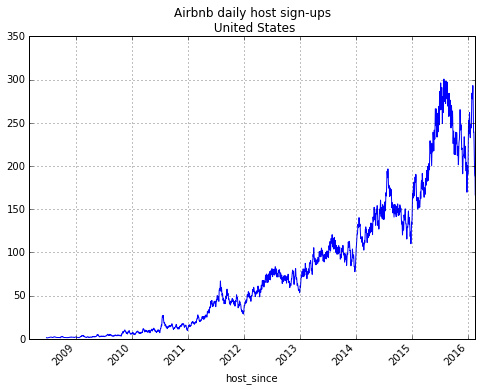

In [8]:
ax = ab_daily_roll.plot(legend=False, title='Airbnb daily host sign-ups \n United States', figsize=(8,6))
plt.xticks(rotation=45)

In [323]:
cs_since_global = cs_df.groupby(by='member_since').count()
cs_since_global_defhosts = cs_df_defhosts.groupby(by='member_since').count()
cs_since_global_defhosts_refver = cs_df_defhosts_refver.groupby(by='member_since').count()

In [10]:
cs_since_global

,city,people_id,state,status
member_since,,,,
2003-01-01,53,53,53,53
2004-01-01,1396,1398,1398,1398
2005-01-01,6854,6856,6856,6856
2006-01-01,10307,10321,10321,10321
2007-01-01,23286,23307,23307,23307
2008-01-01,39086,39110,39110,39110
2009-01-01,47375,47427,47427,47427
2010-01-01,47326,47385,47385,47385
2011-01-01,36424,36491,36491,36491


In [11]:
cs_since_global_defhosts

,city,people_id,state,status
member_since,,,,
2003-01-01,31,31,31,31
2004-01-01,867,868,868,868
2005-01-01,3835,3837,3837,3837
2006-01-01,6038,6046,6046,6046
2007-01-01,13958,13967,13967,13967
2008-01-01,23593,23604,23604,23604
2009-01-01,28885,28905,28905,28905
2010-01-01,29183,29206,29206,29206
2011-01-01,20815,20840,20840,20840


In [324]:
cs_since_global_defhosts_refver

,city,people_id,state,status,verified_status,references_int,any_verification,any_references,any_ref_ver
member_since,,,,,,,,,
2003-01-01,10,10,10,10,10,10,10,10,10
2004-01-01,142,142,142,142,142,142,142,142,142
2005-01-01,681,682,682,682,682,682,682,682,682
2006-01-01,1619,1626,1626,1626,1626,1626,1626,1626,1626
2007-01-01,4124,4131,4131,4131,4131,4131,4131,4131,4131
2008-01-01,6669,6679,6679,6679,6679,6679,6679,6679,6679
2009-01-01,7630,7646,7646,7646,7646,7646,7646,7646,7646
2010-01-01,7872,7887,7887,7887,7887,7887,7887,7887,7887
2011-01-01,6777,6796,6796,6796,6796,6796,6796,6796,6796


# Average 2013

In [12]:
cs_since_global_2013mean = cs_since_global_defhosts.copy()

In [13]:
cs_since_global_2013mean.ix['2013-01-01'] = (cs_since_global_2013mean.ix['2012-01-01'] + cs_since_global_2013mean.ix['2014-01-01']) / 2

In [14]:
cs_year_roll = pandas.rolling_mean(cs_since_global['people_id'], window=2)
cs_year_roll_defhosts = pandas.rolling_mean(cs_since_global_defhosts['people_id'], window=2)



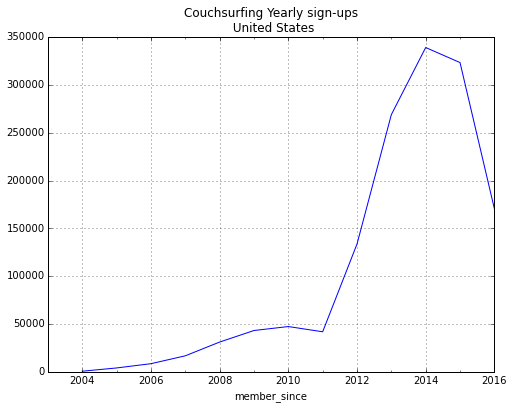

In [15]:
cs_year_roll.plot(title="Couchsurfing Yearly sign-ups\n United States", figsize=(8,6))

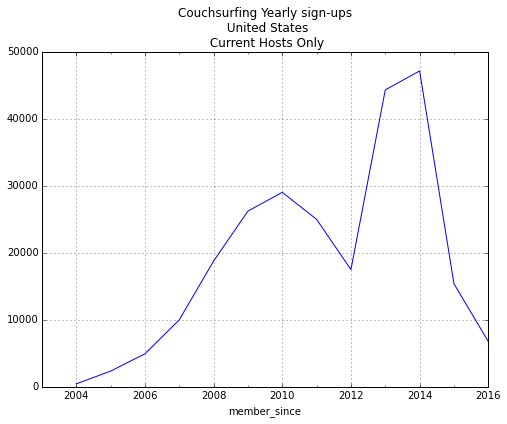

In [16]:
cs_year_roll_defhosts.plot(title="Couchsurfing Yearly sign-ups\n United States\n Current Hosts Only", figsize=(8,6))

In [339]:
ab_since_year = ab_since_global.groupby(by=lambda x: x.year).agg(sum)
ab_since_year_refver = ab_since_global_refver.groupby(by=lambda x: x.year).agg(sum)
cs_since_year = pandas.DataFrame(cs_since_global.groupby(by=lambda x: x.year).agg(sum)['people_id'])
cs_since_year_defhosts = pandas.DataFrame(cs_since_global_defhosts.groupby(by=lambda x: x.year).agg(sum)['people_id'])
cs_since_year_2013mean = pandas.DataFrame(cs_since_global_2013mean.groupby(by=lambda x: x.year).agg(sum)['people_id'])
cs_since_year_defhosts_refver = pandas.DataFrame(cs_since_global_defhosts_refver.groupby(by=lambda x: x.year).agg(sum)['people_id'])

In [340]:
ab_since_year.columns = ['signups']
ab_since_year_refver.columns = ['signups']
cs_since_year.columns = ['signups']
cs_since_year_defhosts.columns = ['signups']
cs_since_year_2013mean.columns = ['signups']
cs_since_year_defhosts_refver.columns = ['signups']

In [341]:
abcs = ab_since_year.join(cs_since_year,how='outer',lsuffix='_ab', rsuffix='_cs')
abcs_all= abcs.join(cs_since_year_defhosts, rsuffix='_cs_definitehosts')
abcs_defhost = ab_since_year.join(cs_since_year_defhosts,how='outer',lsuffix="_ab", rsuffix='_cs_definitehosts')
abcs_2013mean = ab_since_year.join(cs_since_year_2013mean,how='outer',lsuffix="_ab", rsuffix='_cs_2013mean')
abcs_defhost_refver = ab_since_year.join(cs_since_year_defhosts_refver,how='outer',lsuffix="_ab", rsuffix='_cs_definitehosts_refver')
abcs_both_refver = ab_since_year_refver.join(cs_since_year_defhosts_refver,how='outer',lsuffix="_ab", rsuffix='_cs_definitehosts_refver')

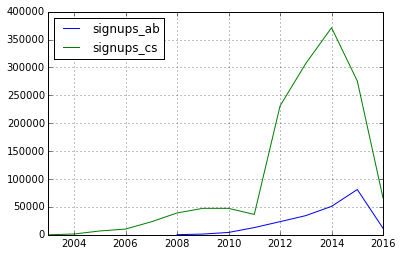

In [20]:
abcs.plot()

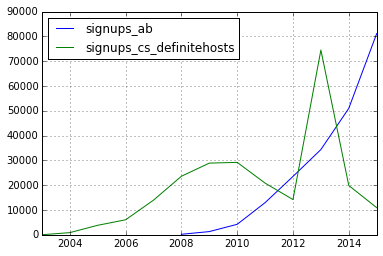

In [355]:
abcs_defhost.ix[:2015].plot()

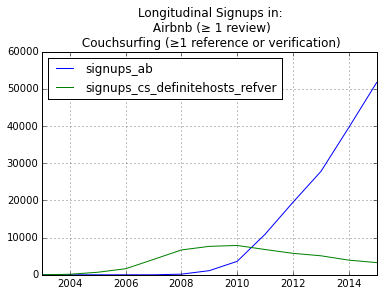

In [354]:
abcs_both_refver.ix[:2015].plot(title='Longitudinal Signups in:\n Airbnb (≥ 1 review)\n Couchsurfing (≥1 reference or verification)')

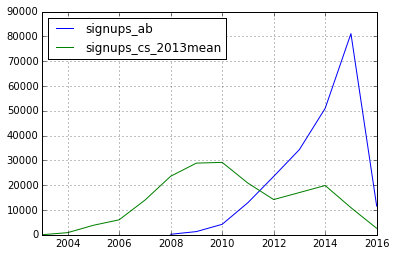

In [22]:
abcs_2013mean.plot()

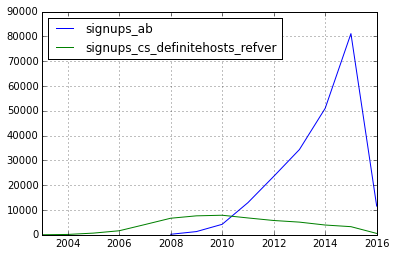

In [332]:
abcs_defhost_refver.plot()

In [346]:
abcs_both_refver.fillna(0, inplace=True)

signups - defintiely host, signups_cs - includes maybe accepting. No 2013 adjustment

In [27]:
abcs_all.corr()

,signups_ab,signups_cs,signups
signups_ab,1.000000,0.814058,-0.053600
signups_cs,0.814058,1.000000,0.478641
signups,-0.053600,0.478641,1.000000


In [23]:
abcs_2013mean.ix[2008:2015].corr()

,signups_ab,signups_cs_2013mean
signups_ab,1.000000,-0.797019
signups_cs_2013mean,-0.797019,1.000000


In [333]:
abcs_defhost_refver.ix[2008:2015].corr()

,signups_ab,signups_cs_definitehosts_refver
signups_ab,1.000000,-0.950764
signups_cs_definitehosts_refver,-0.950764,1.000000


In [349]:
abcs_both_refver.corr()

,signups_ab,signups_cs_definitehosts_refver
signups_ab,1.000000,0.134996
signups_cs_definitehosts_refver,0.134996,1.000000


In [353]:
abcs_both_refver.ix[2008:2015].corr()

,signups_ab,signups_cs_definitehosts_refver
signups_ab,1.000000,-0.966309
signups_cs_definitehosts_refver,-0.966309,1.000000


BY CITY
========

In [92]:
state_dict = dict( (('Alabama', 'AL'),
       ('Alaska', 'AK'),
       ('Arizona', 'AZ'),
       ('Arkansas', 'AR'),
       ('California', 'CA'),
       ('Colorado', 'CO'),
       ('Connecticut', 'CT'),
       ('Delaware', 'DE'),
       ('District of Columbia', 'DC'),
       ('Florida', 'FL'),
       ('Georgia', 'GA'),
       ('Hawaii', 'HI'),
       ('Idaho', 'ID'),
       ('Illinois', 'IL'),
       ('Indiana', 'IN'),
       ('Iowa', 'IA'),
       ('Kansas', 'KS'),
       ('Kentucky', 'KY'),
       ('Louisiana', 'LA'),
       ('Maine', 'ME'),
       ('Maryland', 'MD'),
       ('Massachusetts', 'MA'),
       ('Michigan', 'MI'),
       ('Minnesota', 'MN'),
       ('Mississippi', 'MS'),
       ('Missouri', 'MO'),
       ('Montana', 'MT'),
       ('Nebraska', 'NE'),
       ('Nevada', 'NV'),
       ('New Hampshire', 'NH'),
       ('New Jersey', 'NJ'),
       ('New Mexico', 'NM'),
       ('New York', 'NY'),
       ('North Carolina', 'NC'),
       ('North Dakota', 'ND'),
       ('Ohio', 'OH'),
       ('Oklahoma', 'OK'),
       ('Oregon', 'OR'),
       ('Pennsylvania', 'PA'),
       ('Rhode Island', 'RI'),
       ('South Carolina', 'SC'),
       ('South Dakota', 'SD'),
       ('Tennessee', 'TN'),
       ('Texas', 'TX'),
       ('Utah', 'UT'),
       ('Vermont', 'VT'),
       ('Virginia', 'VA'),
       ('Washington', 'WA'),
       ('West Virginia', 'WV'),
       ('Wisconsin', 'WI'),
       ('Wyoming', 'WY')) )

def state_lookup(s):
    if len(s) ==2:
        return s.lower()
    else:
        try:
            return state_dict[s].lower()
        except KeyError:
            print(s)
            return float('nan')

In [93]:
len(cs_df)
cs_df.dropna(inplace=True)
len(cs_df)

1439269

In [359]:
print(len(cs_df_defhosts_refver))
cs_df_defhosts_refver.dropna(inplace=True)
print(len(cs_df_defhosts_refver))

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


54018

In [356]:
cs_df.head()

,city,member_since,people_id,state,status,verified_status,references_int
0,Wadley,2009-01-01,/people/stopsmoking384,AL,Accepting Guests,Not Verified,0
1,Adamsville,2013-01-01,/people/randolphposey,AL,Accepting Guests,Not Verified,0
2,Graysville,2012-01-01,/people/bart4,AL,Maybe Accepting Guests,Not Verified,0
3,Abbeville,2012-01-01,/people/benia.acoose,Alabama,Maybe Accepting Guests,Not Verified,0
4,Abbeville,2009-01-01,/people/krsmrsh14,Alabama,Accepting Guests,Not Verified,0


In [94]:
cs_df['state'] = cs_df['state'].map(state_lookup)
cs_df['city'] = cs_df['city'].apply(lambda x: x.strip().lower())
cs_df['state'] = cs_df['state'].apply(lambda x: x.strip().lower())
cs_df['citystate'] = cs_df['city'] + '_' + cs_df['state']
cs_df['year'] = cs_df['member_since'].apply(lambda x: x.year)

In [358]:
cs_df_defhosts_refver['city']

147       Pelham
158    Alabaster
220       Pelham
381       Oxford
399    Andalusia
409    Andalusia
430         Arab
484     Ashville
487       Athens
851       Auburn
928       Auburn
929       Auburn
930       Auburn
931       Auburn
933       Auburn
...
1462646             Madison
1462649            Sarasota
1462650             Atlanta
1462652         Los Angeles
1462653             Seattle
1462654           Fairbanks
1462655         Little Rock
1462659               Fargo
1462664         Chapel Hill
1462665            New York
1462667                 NaN
1462668            New York
1462669            New York
1462670    Livingston Manor
1462672            New York
Name: city, Length: 54258, dtype: object

In [360]:
cs_df_defhosts_refver['state'] = cs_df_defhosts_refver['state'].map(state_lookup)
cs_df_defhosts_refver['city'] = cs_df_defhosts_refver['city'].apply(lambda x: x.strip().lower())
cs_df_defhosts_refver['state'] = cs_df_defhosts_refver['state'].apply(lambda x: x.strip().lower())
cs_df_defhosts_refver['citystate'] = cs_df_defhosts_refver['city'] + '_' + cs_df_defhosts_refver['state']
cs_df_defhosts_refver['year'] = cs_df_defhosts_refver['member_since'].apply(lambda x: x.year)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentatio

In [95]:
len(cs_df)
cs_df.dropna(inplace=True)
len(cs_df)

1439269

In [96]:
cs_df_all = cs_df[['citystate','year','people_id']]
cs_df_definite = cs_df[cs_df['status'] == 'Accepting Guests'][['citystate','year','people_id']]

In [97]:
cs_citystate = cs_df_definite.groupby(by=['citystate','year']).agg(len)

In [367]:
len(cs_df_defhosts_refver)

54018

In [478]:
cs_df_defhosts_refver.to_csv('cleaned csv/cs_defhosts_refver.csv',columns=['people_id','year','citystate'])

In [394]:
cs_df_defhosts_refver_selectcol = cs_df_defhosts_refver[['citystate','year','people_id']]
cs_citystate_refver = cs_df_defhosts_refver_selectcol.groupby(by=['citystate','year']).agg(len)

In [402]:
cs_citystate_refver.columns = ['signups']

# Average out the 2013 anomaly

In [98]:
cs_citystate.columns = ['signups']

In [99]:
cs_citystate.unstack()['signups'].sum()

year
2003       31
2004      867
2005     3835
2006     6038
2007    13958
2008    23593
2009    28885
2010    29183
2011    20815
2012    14171
2013    74461
2014    19811
2015    10563
2016     2480
dtype: float64

In [100]:
cs_citystate_unstacked = cs_citystate.unstack()
cs_citystate_unstacked.fillna(0, inplace=True)
mean2013 = (cs_citystate_unstacked['signups'][2012] +  cs_citystate_unstacked['signups'][2014]) /2

In [101]:
mean2013.sum()

16991.0

In [102]:
cs_citystate_2013mean = cs_citystate_unstacked.copy()

In [103]:
cs_citystate_2013mean.columns

MultiIndex(levels=[['signups'], [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]],
           names=[None, 'year'])

In [105]:
cs_citystate_2013mean.loc[:,('signups',2013)] = mean2013

In [106]:
cs_citystate_2013mean['signups'].sum()

year
2003       31
2004      867
2005     3835
2006     6038
2007    13958
2008    23593
2009    28885
2010    29183
2011    20815
2012    14171
2013    16991
2014    19811
2015    10563
2016     2480
dtype: float64

In [369]:
ab_loc = pandas.read_csv('2016-02-16/listings.csv.gz', compression='gzip', usecols=['host_id','host_since','city','state','number_of_reviews'])
hosts_loc = ab_df.groupby(by='host_id',as_index=True).agg(min)

ab_refver = ab_loc[ab_loc['number_of_reviews']>=1]


In [375]:
print(len(ab_loc))
ab_loc.dropna(inplace=True)
print(len(ab_loc))

print(len(ab_refver))
ab_refver.dropna(inplace=True)
print(len(ab_refver))

336140
336140
223540
223540


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [376]:
ab_loc['city'] = ab_loc['city'].apply(lambda x: x.strip().lower())
ab_loc['state'] = ab_loc['state'].apply(lambda x: x.strip().lower())
ab_loc['citystate'] = ab_loc['city'] + '_' + ab_loc['state']
ab_loc['host_since'] = ab_loc['host_since'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d') if isinstance(x,str) else x)
ab_loc['year'] = ab_loc['host_since'].apply(lambda x: x.year)

In [377]:

ab_refver['city'] = ab_refver['city'].apply(lambda x: x.strip().lower())
ab_refver['state'] = ab_refver['state'].apply(lambda x: x.strip().lower())
ab_refver['citystate'] = ab_refver['city'] + '_' + ab_refver['state']
ab_refver['host_since'] = ab_refver['host_since'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d') if isinstance(x,str) else x)
ab_refver['year'] = ab_refver['host_since'].apply(lambda x: x.year)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation

In [477]:
ab_refver.to_csv('cleaned csv/ab_hosts_refver.csv')

In [381]:
ab_loc = ab_loc[['citystate','year','host_id']]
ab_citystate = ab_loc.groupby(by=['citystate','year']).agg(len)

ab_refver = ab_refver[['citystate','year','host_id']]
ab_citystate_refver = ab_refver.groupby(by=['citystate','year']).agg(len)

In [382]:
ab_citystate.columns = ['signups']
ab_citystate_refver.columns = ['signups']

In [403]:
abcs_citystate = pandas.merge(cs_citystate, ab_citystate, how='outer', left_index=True, right_index=True, suffixes=('_cs','_ab'))
abcs_citystate_2013mean = pandas.merge(cs_citystate_2013mean.stack(), ab_citystate, how='outer', left_index=True, right_index=True, suffixes=('_cs','_ab'))
abcs_citystate_refver = pandas.merge(cs_citystate_refver, ab_citystate_refver, how='outer', left_index=True, right_index=True, suffixes=('_cs','_ab'))


In [404]:
abcs_citystate.fillna(0, inplace=True)
abcs_citystate_2013mean.fillna(0, inplace=True)
abcs_citystate_refver.fillna(0, inplace=True)

In [406]:
cs_cum = abcs_citystate.unstack()['signups_cs'].sum(axis=1)
cs_cum_2013mean = abcs_citystate_2013mean.unstack()['signups_cs'].sum(axis=1)
ab_cum = abcs_citystate.unstack()['signups_ab'].sum(axis=1)

cs_cum_refver = abcs_citystate_refver.unstack()['signups_cs'].sum(axis=1)
ab_cum_refver = abcs_citystate_refver.unstack()['signups_ab'].sum(axis=1)

In [124]:
dual_min = 100
big_cities = abcs_citystate.unstack().ix[ab_cum >=dual_min].ix[cs_cum >=dual_min]
small_cities = abcs_citystate.unstack().ix[ab_cum <dual_min].ix[cs_cum <dual_min]
big_cities_2013mean = abcs_citystate_2013mean.unstack().ix[ab_cum >=dual_min].ix[cs_cum >=dual_min]
small_cities_2013mean = abcs_citystate_2013mean.unstack().ix[ab_cum <dual_min].ix[cs_cum <dual_min]



In [436]:
dual_min_refver = 50
big_cities_refver = abcs_citystate_refver.unstack().ix[ab_cum_refver >=dual_min_refver].ix[cs_cum_refver >=dual_min_refver]
small_cities_refver = abcs_citystate_refver.unstack().ix[ab_cum_refver <dual_min_refver].ix[cs_cum_refver <dual_min_refver]

# City Size in General, Correlations

In [437]:
big_cities.stack().corr()

,signups_cs,signups_ab
signups_cs,1.000000,0.483983
signups_ab,0.483983,1.000000


In [438]:
small_cities.stack().corr()

,signups_cs,signups_ab
signups_cs,1.000000,-0.028088
signups_ab,-0.028088,1.000000


In [439]:
big_cities_2013mean.stack().corr()

,signups_cs,signups_ab
signups_cs,1.000000,0.480205
signups_ab,0.480205,1.000000


In [440]:
small_cities_2013mean.stack().corr()

,signups_cs,signups_ab
signups_cs,1.000000,0.111111
signups_ab,0.111111,1.000000


In [441]:
big_cities_refver.stack().corr()

,signups_cs,signups_ab
signups_cs,1.000000,0.459235
signups_ab,0.459235,1.000000


In [442]:
small_cities_refver.stack().corr()

,signups_cs,signups_ab
signups_cs,1.00000,-0.19906
signups_ab,-0.19906,1.00000


# City Size Graphs 2013-spikey

In [ ]:
big_cities_groups = big_cities.stack().groupby(level=0)

big_cities_corr_refver = big_cities_groups.agg(lambda x: x.corr().iloc[1,0])

#this is not dangerous just because agg returned weird
del big_cities_corr_refver['signups_ab']
big_cities_corr_refver.columns = ['signup_abcs_correlation']

big_cities_corr_refver.sort(columns='signup_abcs_correlation')

big_cities_extremes = big_cities_corr_refver.sort(columns='signup_abcs_correlation').iloc[0:15,].append(big_cities_corr_refver.sort(columns='signup_abcs_correlation').iloc[-15:,])

print('# Top and Bottom 10 Cities by Host Signup Correlation')

for city, corr in big_cities_extremes.iterrows():
    print(city, corr[0])
    for dfcity, df in big_cities_groups:
        if city==dfcity:
            ax = df.plot(title='{} has corr {}'.format(city, corr[0]), rot=45)

print('# Top and Bottom 10 Cities by AB size')

big_cities_absize = big_cities_groups.agg(sum).sort('signups_ab', ascending=False)

for city, row in big_cities_absize.iloc[:20].iterrows():
    print(city, row[0])
    for dfcity, df in big_cities_groups:
        if city==dfcity:
            ax = df.plot(title='{} has ab_hosts {}'.format(city, row[0]), rot=45)

# City Size, with 2013 mean adjusted

In [444]:
big_cities_corr_refver.ix['minneapolis_mn']

signup_abcs_correlation    0.224269
Name: minneapolis_mn, dtype: float64

In [ ]:
big_cities_groups = big_cities_2013mean.stack().groupby(level=0)

big_cities_corr_refver = big_cities_groups.agg(lambda x: x.corr().iloc[1,0])

#this is not dangerous just because agg returned weird
del big_cities_corr_refver['signups_ab']
big_cities_corr_refver.columns = ['signup_abcs_correlation']

big_cities_corr_refver.sort(columns='signup_abcs_correlation')

big_cities_extremes = big_cities_corr_refver.sort(columns='signup_abcs_correlation').iloc[0:15,].append(big_cities_corr_refver.sort(columns='signup_abcs_correlation').iloc[-15:,])

print('# Top and Bottom 10 Cities by Host Signup Correlation')

for city, corr in big_cities_extremes.iterrows():
    print(city, corr[0])
    for dfcity, df in big_cities_groups:
        if city==dfcity:
            ax = df.plot(title='{} has corr {}'.format(city, corr[0]), rot=45)

print('# Top and Bottom 10 Cities by AB size')

big_cities_absize = big_cities_groups.agg(sum).sort('signups_ab', ascending=False)

for city, row in big_cities_absize.iloc[:20].iterrows():
    print(city, row[0])
    for dfcity, df in big_cities_groups:
        if city==dfcity:
            ax = df.plot(title='{} has ab_hosts {}'.format(city, row[0]), rot=45)

# Big Cities, with 1 References Verification Cutoff

# Top and Bottom 10 Cities by Host Signup Correlation
amherst_ma -0.674475793053
greensboro_nc -0.534336094332
bozeman_mt -0.48160368189
tacoma_wa -0.467242322951
olympia_wa -0.432281109731
portland_me -0.428827975316
mesa_az -0.423631852999
lancaster_pa -0.420076261225
fayetteville_ar -0.39465950024
eugene_or -0.376676316909
missoula_mt -0.350585448568
saint petersburg_fl -0.350338662314
iowa city_ia -0.347510459464
athens_ga -0.310716039269
cleveland_oh -0.309235650747
honolulu_hi 0.294701759109
san francisco_ca 0.329474973065
santa barbara_ca 0.343677895484
state college_pa 0.379281346027
fort lauderdale_fl 0.388901454906
virginia beach_va 0.389436931904
miami_fl 0.427647227931
los angeles_ca 0.442596954938
boston_ma 0.486966837738
detroit_mi 0.507281090954
santa monica_ca 0.61343471439
el paso_tx 0.631611317306
new york_ny 0.687999797683
miami beach_fl 0.792407905908
washington_dc 0.843483397116
# Top and Bottom 10 Cities by AB size
new york_ny 1456.0
los angeles_ca 1043.0
brooklyn

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


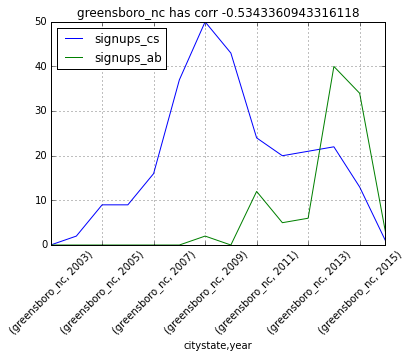

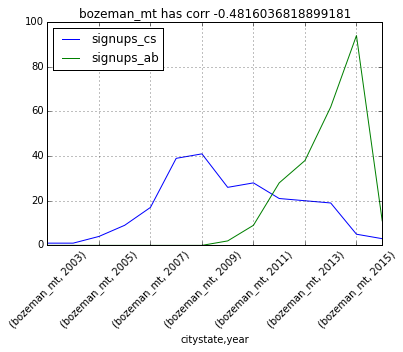

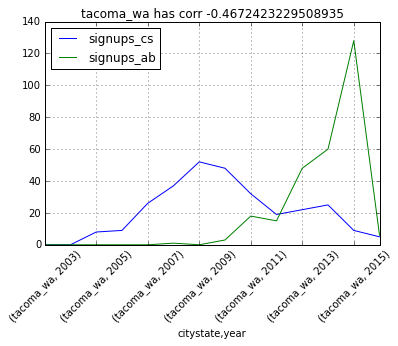

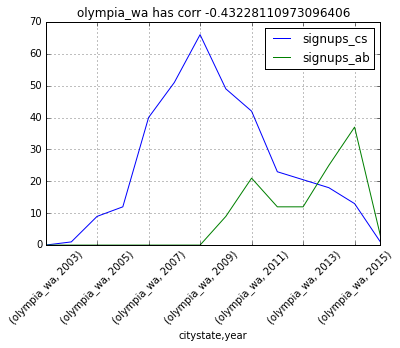

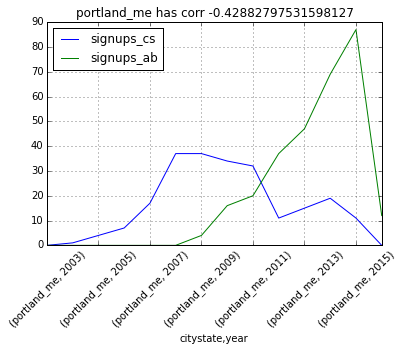

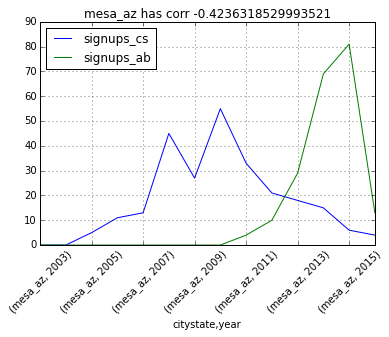

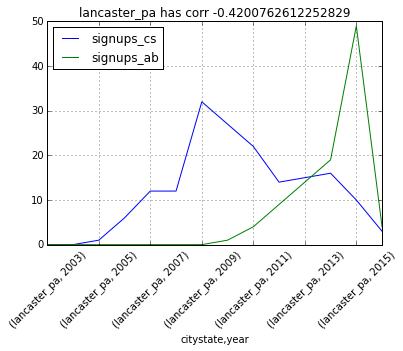

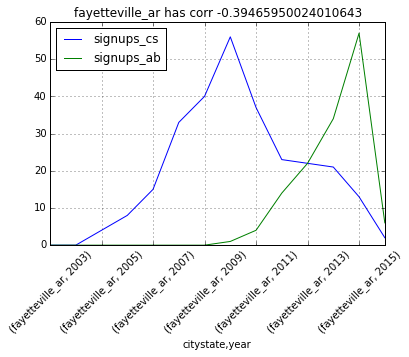

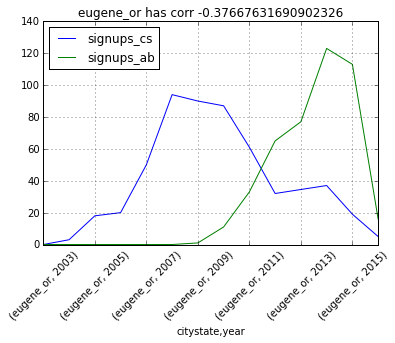

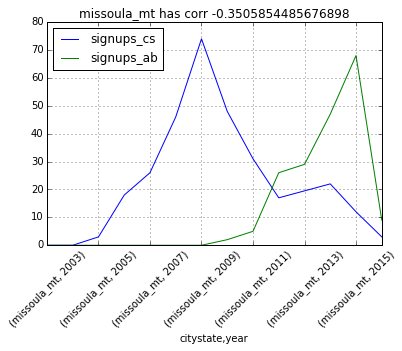

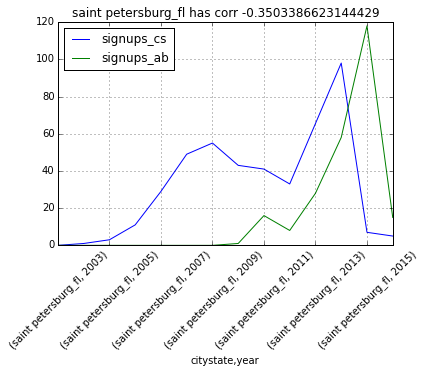

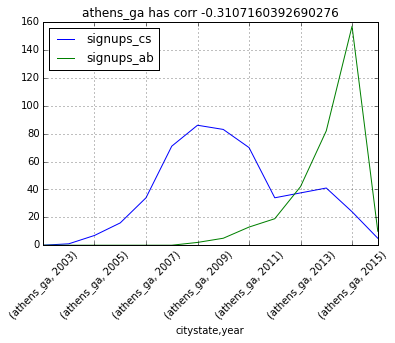

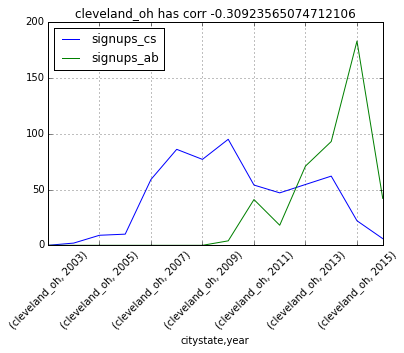

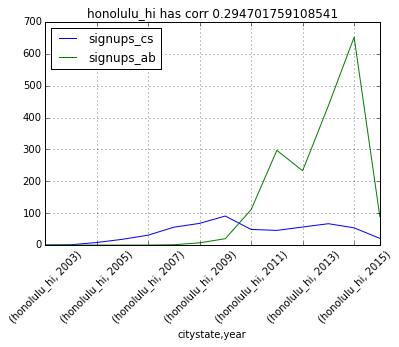

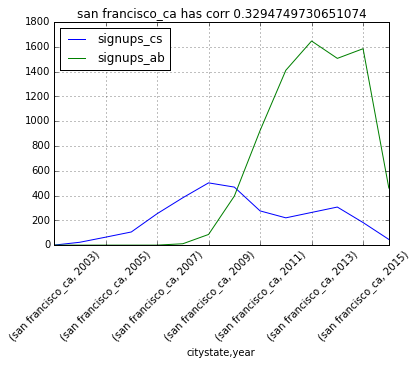

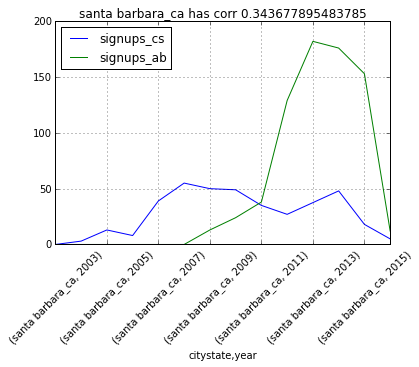

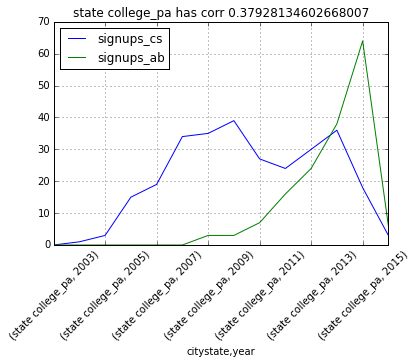

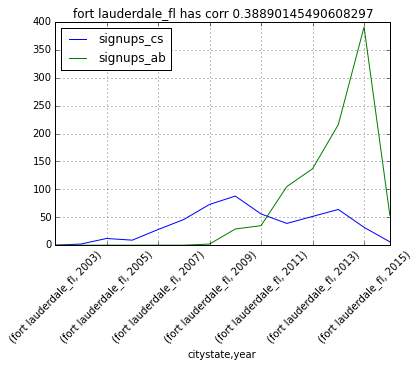

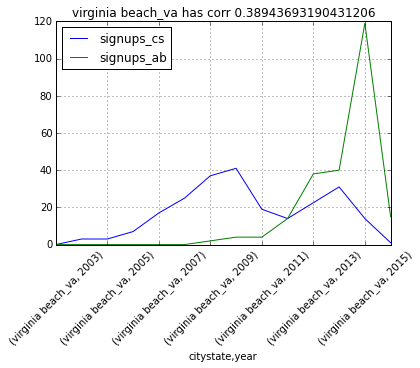

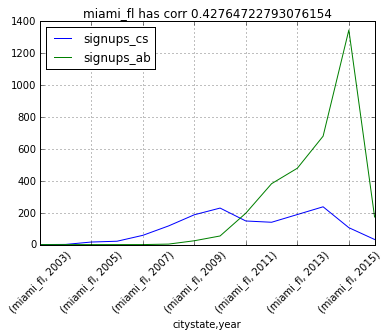

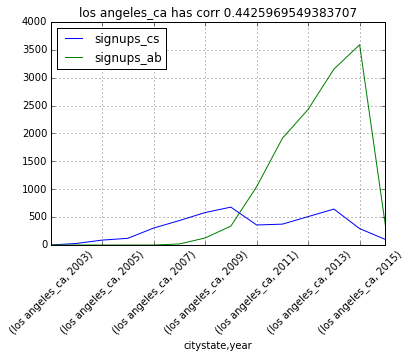

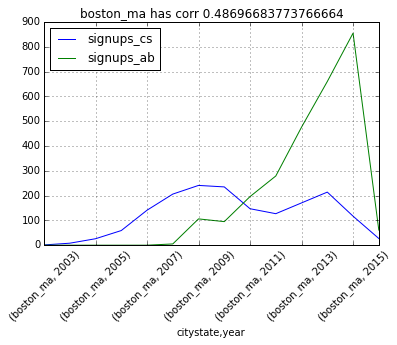

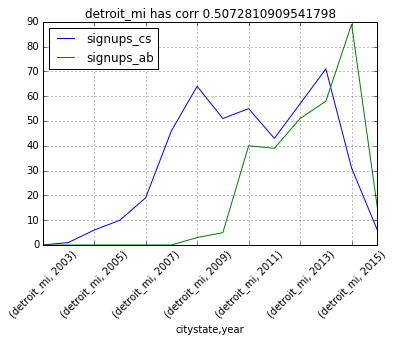

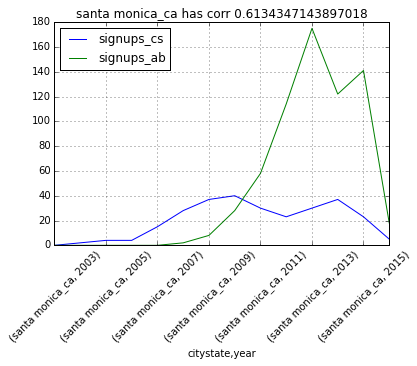

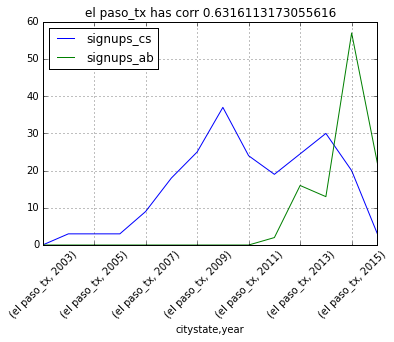

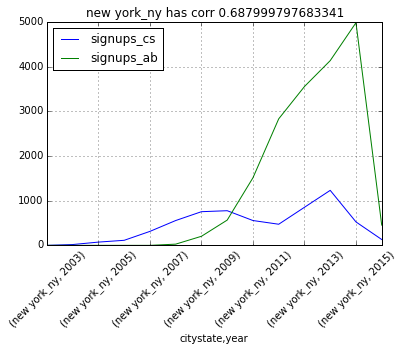

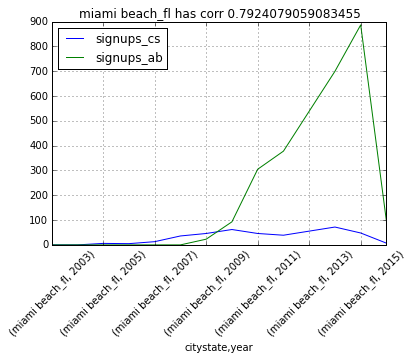

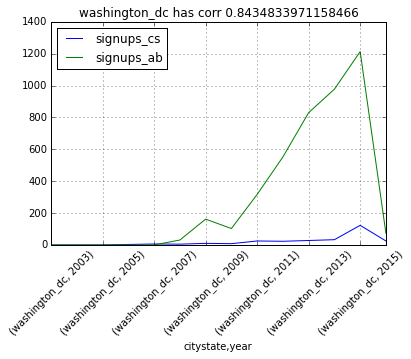

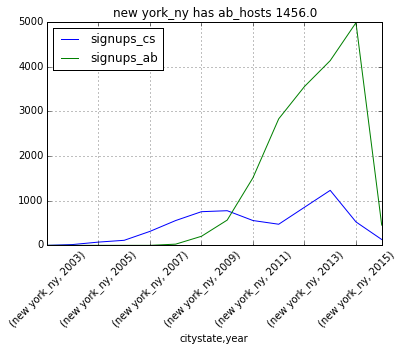

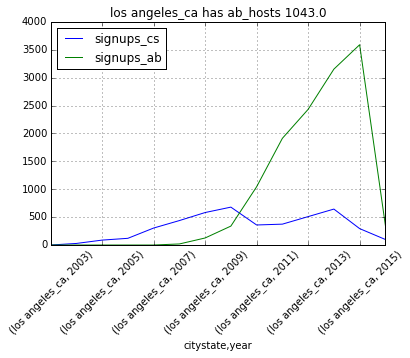

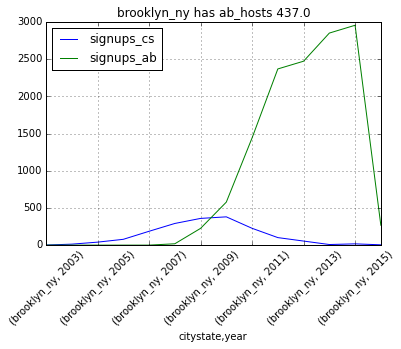

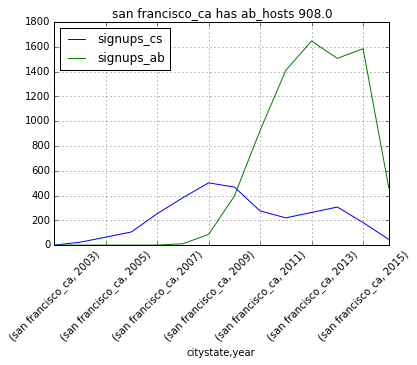

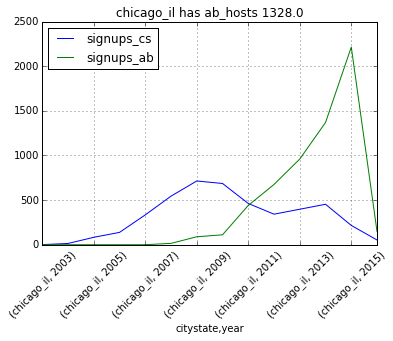

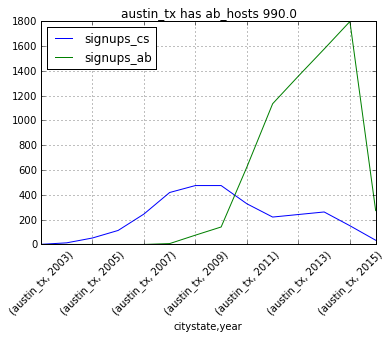

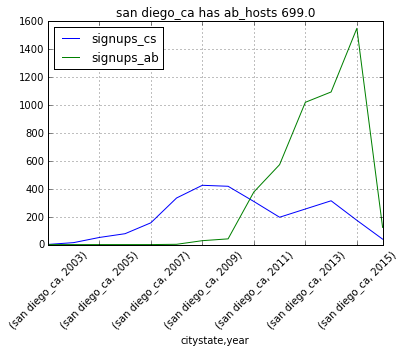

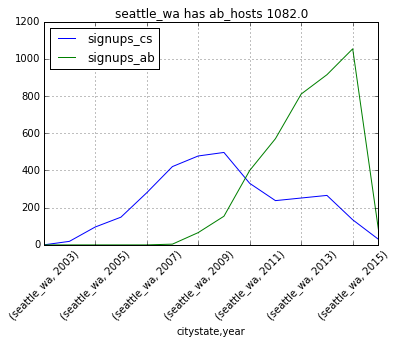

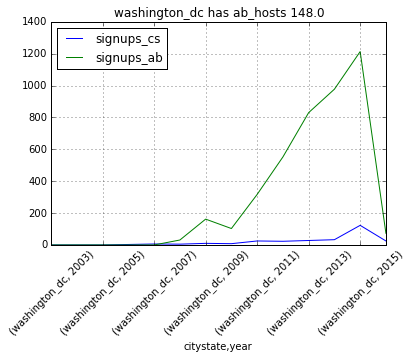

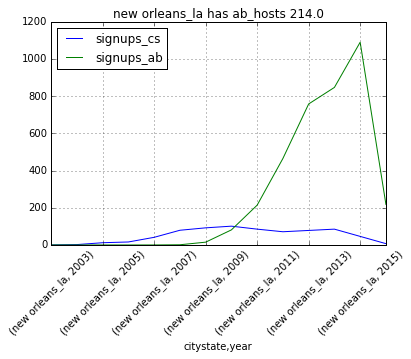

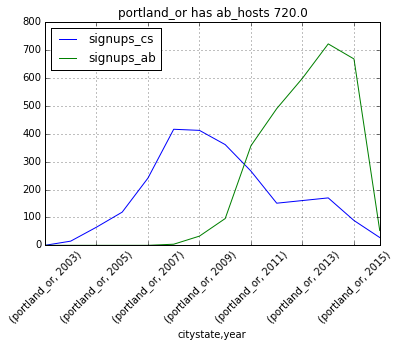

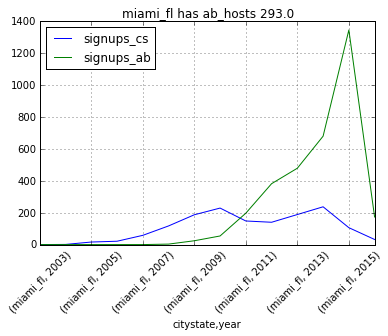

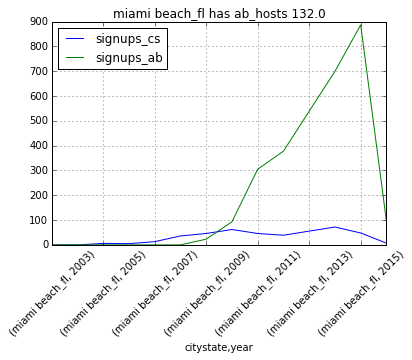

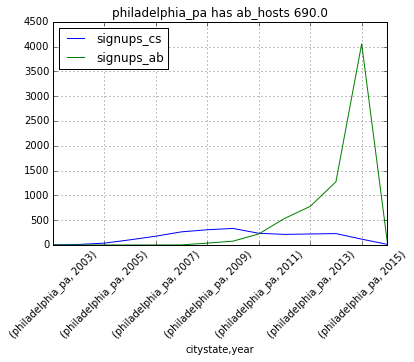

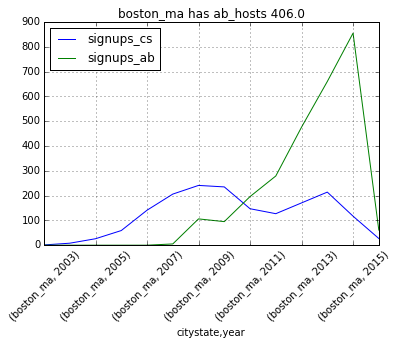

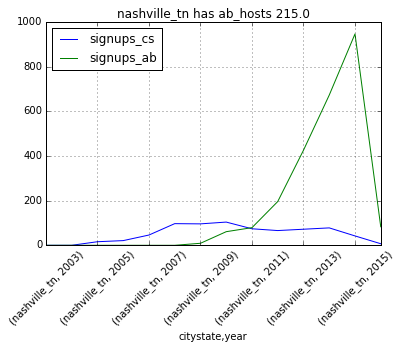

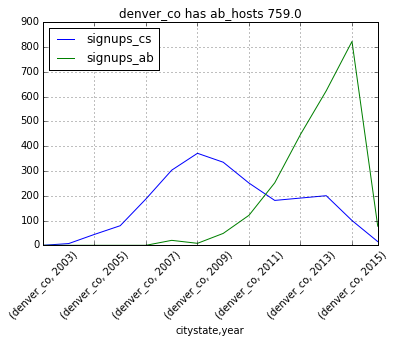

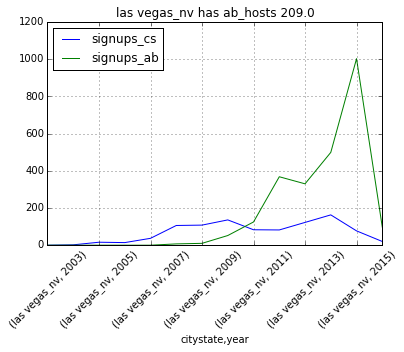

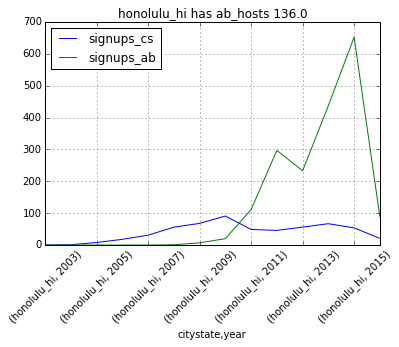

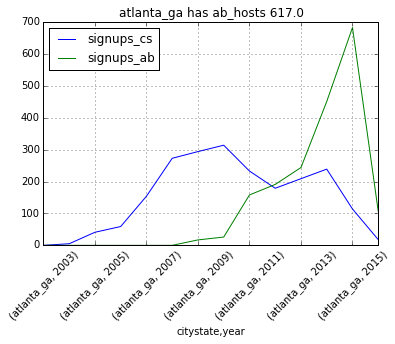

In [446]:
big_cities_groups_refver = big_cities_refver.stack().groupby(level=0)

big_cities_corr_refver = big_cities_groups_refver.agg(lambda x: x.corr().iloc[1,0])

#this is not dangerous just because agg returned weird
del big_cities_corr_refver['signups_ab']
big_cities_corr_refver.columns = ['signup_abcs_correlation']

big_cities_corr_refver.sort(columns='signup_abcs_correlation')

big_cities_extremes = big_cities_corr_refver.sort(columns='signup_abcs_correlation').iloc[0:15,].append(big_cities_corr_refver.sort(columns='signup_abcs_correlation').iloc[-15:,])

print('# Top and Bottom 10 Cities by Host Signup Correlation')

for city, corr in big_cities_extremes.iterrows():
    print(city, corr[0])
    for dfcity, df in big_cities_groups:
        if city==dfcity:
            ax = df.plot(title='{} has corr {}'.format(city, corr[0]), rot=45)

print('# Top and Bottom 10 Cities by AB size')

big_cities_absize = big_cities_groups_refver.agg(sum).sort('signups_ab', ascending=False)

for city, row in big_cities_absize.iloc[:20].iterrows():
    print(city, row[0])
    for dfcity, df in big_cities_groups:
        if city==dfcity:
            ax = df.plot(title='{} has ab_hosts {}'.format(city, row[0]), rot=45)

# Load Census Data

In [447]:
census_df = pandas.read_csv('geographic/nhgis0005_csv/nhgis0005_ds206_20145_2014_place.csv',encoding = "ISO-8859-1",usecols=['STATE','PLACE','ABDPE001'])

In [448]:
%%capture
census_df['state_abbr'] = census_df['STATE'].apply(state_lookup)

In [449]:
census_df.dropna(inplace=True) #gets rid of puerto rico.

In [450]:
census_df['place_end'] = census_df['PLACE'].apply(lambda x: x.split(" ")[-1])

In [451]:
census_df.tail()

,STATE,PLACE,ABDPE001,state_abbr,place_end
29291,Wyoming,Woods Landing-Jelm CDP,13958,wy,CDP
29292,Wyoming,Worland city,38652,wy,city
29293,Wyoming,Wright town,80272,wy,town
29294,Wyoming,Yoder town,36250,wy,town
29295,Wyoming,Y-O Ranch CDP,51852,wy,CDP


In [452]:
census_df['place_end'].value_counts()

city            10131
CDP              8962
town             4319
village          3752
borough          1205
County)           116
(balance)           8
municipality        4
government          4
Counties)           3
County              3
City                1
county              1
Princeton           1
corporation         1
dtype: int64

In [453]:
census_abcs_map = {'Athens-Clarke County unified government (balance)': 'athens',
               'Augusta-Richmond County consolidated government (balance)':'augusta',
               'Boise City city':'boise',
               'East Honolulu CDP':'honolulu',
               'Indianapolis city (balance)':'indianapolis',
               'Lexington-Fayette urban county':'lexington',
               'Louisville/Jefferson County metro government (balance)':'louisville',
               'Nashville-Davidson metropolitan government (balance)':'nashville',
               'St. Augustine city': 'saint augustine',
               'St. Louis city':'saint louis',
               'St. Paul city':'saint paul',
               'St. Petersburg city':'saint petersburg',
               'San Buenaventura (Ventura) city':'ventura'}


def norm_place(s):
    try:
        return census_abcs_map[s]
    except KeyError:
        end = s.split(" ")[-1]
        if end in ['city','CDP','town','village', 'borough', 'municipality']:
            snorm = ' '.join(s.split(' ')[:-1])
            return snorm.lower()
        else:
            return s

In [454]:
census_df['place_norm'] = census_df['PLACE'].apply(norm_place)

In [455]:
census_df['citystate'] = census_df['place_norm'] + '_' + census_df['state_abbr']

In [456]:
census_merge = census_df[['ABDPE001','citystate']]
census_merge.columns = ['income','citystate']

In [457]:
abcs_census_corr = pandas.merge(big_cities_corr_refver,census_merge, how='inner', left_index=True, right_on='citystate')

In [458]:
print(len(big_cities_corr_refver))
print(len(abcs_census))

144
184


In [459]:
#these are the missing ones
print(big_cities_corr_refver.index - abcs_census_corr['citystate'])

Index(['amherst_ma', 'brooklyn_ny'], dtype='object')


In [474]:
small_census_df = census_df[['ABDPE001','citystate']]
small_census_df.columns = ['income','citystate']

In [475]:
small_census_df.to_csv('census_income.csv')

In [460]:
census_df[census_df['PLACE'].apply(lambda x: 'ventura' in x.lower())]

,STATE,PLACE,ABDPE001,state_abbr,place_end,place_norm,citystate
3106,California,San Buenaventura (Ventura) city,66485,ca,city,ventura,ventura_ca
4146,Florida,Aventura city,59657,fl,city,aventura,aventura_fl
4212,Florida,Buenaventura Lakes CDP,41155,fl,CDP,buenaventura lakes,buenaventura lakes_fl
9022,Iowa,Ventura city,61250,ia,city,ventura,ventura_ia
16808,New Mexico,Ventura CDP,38828,nm,CDP,ventura,ventura_nm


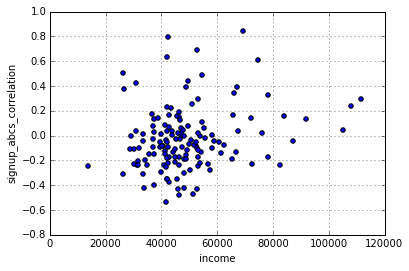

In [461]:
abcs_census_corr.plot(y= 'signup_abcs_correlation', x='income', kind='scatter')

In [462]:
pandas.stats.ols.OLS(abcs_census['income'], abcs_census['signup_abcs_correlation'])


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         184
Number of Degrees of Freedom:   2

R-squared:         0.0015
Adj R-squared:    -0.0040

Rmse:          21708.1562

F-stat (1, 182):     0.2704, p-value:     0.6037

Degrees of Freedom: model 1, resid 182

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x  4686.2929  9012.2521       0.52     0.6037 -12977.7212 22350.3069
     intercept 55496.6036  1764.7926      31.45     0.0000 52037.6102 58955.5970
---------------------------------End of Summary---------------------------------

In [463]:
big_cities_size = big_cities_groups.agg(sum)

In [464]:
abcs_census_size = pandas.merge(big_cities_size,census_merge, how='inner', left_index=True, right_on='citystate')

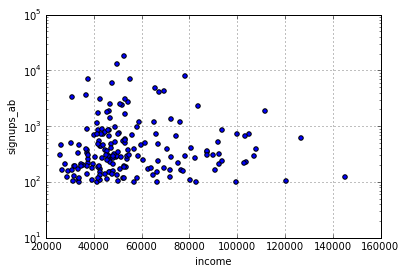

In [465]:
abcs_census_size.plot(x='income', y='signups_ab', kind='scatter')
plt.yscale('log')

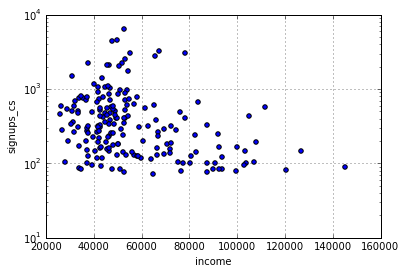

In [466]:
abcs_census_size.plot(x='income', y='signups_cs', kind='scatter')
plt.yscale('log')

In [467]:
abcs_census_size['ratio'] = abcs_census_size['signups_cs'] / abcs_census_size['signups_ab']

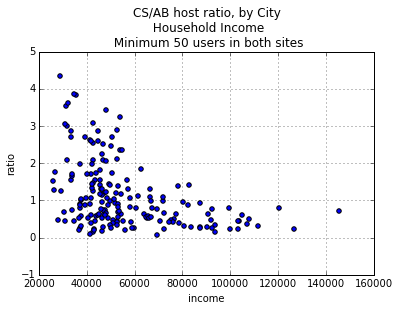

In [479]:
abcs_census_size.plot(x='income', y='ratio', kind='scatter', title='CS/AB host ratio, by City \n Household Income \n Minimum {} users in both sites'.format(dual_min_refver))

In [480]:
pandas.stats.ols.OLS(abcs_census_size['ratio'], abcs_census_size['income'])


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         184
Number of Degrees of Freedom:   2

R-squared:         0.1702
Adj R-squared:     0.1657

Rmse:              0.8142

F-stat (1, 182):    37.3328, p-value:     0.0000

Degrees of Freedom: model 1, resid 182

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -0.0000     0.0000      -6.11     0.0000    -0.0000    -0.0000
     intercept     2.0786     0.1664      12.49     0.0000     1.7524     2.4048
---------------------------------End of Summary---------------------------------

# Cities to check for overlap
highest and lowest correlations, ratios, and income for harman and zhiyi

In [501]:
corr_sorted = big_cities_corr_refver.sort('signup_abcs_correlation')
least_corr, most_corr = corr_sorted[:10], corr_sorted[-10:]
print(least_corr)
print(most_corr)

                 signup_abcs_correlation
citystate                               
amherst_ma                     -0.674476
greensboro_nc                  -0.534336
bozeman_mt                     -0.481604
tacoma_wa                      -0.467242
olympia_wa                     -0.432281
portland_me                    -0.428828
mesa_az                        -0.423632
lancaster_pa                   -0.420076
fayetteville_ar                -0.394660
eugene_or                      -0.376676
                   signup_abcs_correlation
citystate                                 
virginia beach_va                 0.389437
miami_fl                          0.427647
los angeles_ca                    0.442597
boston_ma                         0.486967
detroit_mi                        0.507281
santa monica_ca                   0.613435
el paso_tx                        0.631611
new york_ny                       0.688000
miami beach_fl                    0.792408
washington_dc                     0

In [505]:
sorted_ratio = abcs_census_size.sort('ratio')
least_ratio, most_ratio = sorted_ratio[:10], sorted_ratio[-10:]
print(least_ratio)
print(most_ratio)

       signups_cs  signups_ab  income            citystate     ratio
4119        289.0        4258   69235        washington_dc  0.067872
3213        118.0        1162   41380  south lake tahoe_ca  0.101549
4626        435.5        3020   42547       miami beach_fl  0.144205
3140        123.5         848   93840       santa clara_ca  0.145637
4454        148.5         853   46419         hollywood_fl  0.174091
10622       715.0        3689   36964       new orleans_la  0.193819
3385        143.0         689   56025    west hollywood_ca  0.207547
4826         91.0         434   43204   saint augustine_fl  0.209677
3254        147.5         677  103257         sunnyvale_ca  0.217873
2843        166.0         727   43077     mountain view_ca  0.228336
       signups_cs  signups_ab  income       citystate     ratio
16951       583.0         195   31668      buffalo_ny  2.989744
17727       502.5         164   30784    rochester_ny  3.064024
27327       520.5         169   42440   bellingha

In [504]:
sorted_income = abcs_census_size.sort('income')
least_income, most_income = sorted_income[:10], sorted_income[-10:]
print(least_income)
print(most_income)

       signups_cs  signups_ab  income         citystate     ratio
11849       460.0         300   26095        detroit_mi  1.533333
19381       583.5         452   26179      cleveland_oh  1.290929
22974       284.0         161   26627  state college_pa  1.763975
4293        103.0         213   28164  daytona beach_fl  0.483568
7455        538.5         124   28660    bloomington_in  4.342742
26735       200.5         159   29271     blacksburg_va  1.261006
17338       342.5         493   30318         ithaca_ny  0.694726
17727       502.5         164   30784      rochester_ny  3.064024
4625       1480.5        3338   30858          miami_fl  0.443529
48          364.0         103   31217     birmingham_al  3.533981
       signups_cs  signups_ab  income         citystate     ratio
3039         96.0         217  103064  redondo beach_ca  0.442396
3254        147.5         677  103257      sunnyvale_ca  0.217873
2422        100.5         224  103591        fremont_ca  0.448661
26708     

# mulitlisters, multicities

In [527]:
ab_df.head()

,host_id,host_since,smart_location,number_of_reviews,any_reviews
0,5803,2008-12-30,"Washington, DC",13,1
1,24098,2009-07-01,"Siren, WI",0,0
2,36016,2009-09-03,"Hollidaysburg, PA",18,1
3,38067,2009-09-12,"Kihei, HI",4,1
4,38067,2009-09-12,"Kihei , HI",0,0


In [534]:
host_num_cities = ab_df[['host_id','smart_location']].groupby(by='host_id').agg({'host_id':len,
                                                                                 'smart_location':lambda x: len(set(x))})

In [536]:
host_num_cities

,smart_location,host_id
host_id,,
23,1,1
42,1,1
43,1,1
46,1,1
83,1,1
240,1,1
249,1,1
283,1,1
316,1,1


In [530]:
multi_city_hosts = host_num_cities[host_num_cities['smart_location'] > 1]

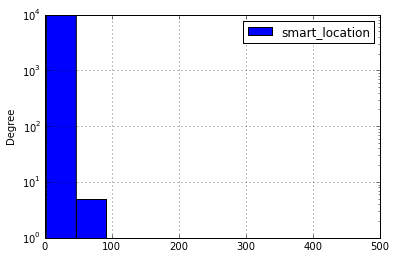

In [523]:
multi_city_hosts.plot(kind='hist')
plt.yscale('log')

In [525]:
multi_city_hosts.sort('smart_location',ascending=False).head()

,smart_location
host_id,
50521917,450
48618586,146
9296727,101
31148752,87
21939069,72


In [538]:
multilisters = host_num_cities[host_num_cities['host_id'] > 2]

In [539]:
len(multi_city_hosts)/len(multilisters)

0.5897341663604068

# 58% of multilisters have listings in more than 1 city too